In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
matches = pd.read_csv('matches.csv')
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,Match Report,NaN,18,6,17.3,0,0,0,2022,Arsenal
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,Match Report,NaN,9,4,18.8,0,0,0,2022,Arsenal
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,Match Report,NaN,11,7,12.9,0,0,0,2022,Arsenal
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,Match Report,NaN,7,4,12.1,0,0,0,2022,Arsenal
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,Match Report,NaN,5,3,11.3,0,0,0,2022,Arsenal


In [3]:
matches.isnull().sum()

date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance          0
captain             0
formation           0
opp formation       0
referee             0
match report        0
notes            1292
sh                  0
sot                 0
dist                0
fk                  0
pk                  0
pkatt               0
season              0
team                0
dtype: int64

In [4]:
matches['team'].value_counts()

team
Arsenal                     76
Manchester City             76
Chelsea                     76
Newcastle United            76
Nottingham Forest           76
Brighton and Hove Albion    76
Fulham                      76
Crystal Palace              76
Everton                     76
Manchester United           76
Wolverhampton Wanderers     76
Leicester City              38
Ipswich Town                38
Southampton                 38
Liverpool                   38
Aston Villa                 38
Tottenham Hotspur           38
West Ham United             38
Bournemouth                 38
Brentford                   38
Luton Town                  38
Burnley                     38
Sheffield United            38
Name: count, dtype: int64

In [18]:
matches['round'].value_counts()

round
Matchweek 1     34
Matchweek 2     34
Matchweek 3     34
Matchweek 4     34
Matchweek 5     34
Matchweek 6     34
Matchweek 7     34
Matchweek 8     34
Matchweek 9     34
Matchweek 10    34
Matchweek 11    34
Matchweek 12    34
Matchweek 13    34
Matchweek 14    34
Matchweek 15    34
Matchweek 16    34
Matchweek 17    34
Matchweek 18    34
Matchweek 19    34
Matchweek 20    34
Matchweek 21    34
Matchweek 22    34
Matchweek 23    34
Matchweek 24    34
Matchweek 25    34
Matchweek 26    34
Matchweek 27    34
Matchweek 28    34
Matchweek 29    34
Matchweek 30    34
Matchweek 31    34
Matchweek 32    34
Matchweek 33    34
Matchweek 34    34
Matchweek 35    34
Matchweek 36    34
Matchweek 37    34
Matchweek 38    34
Name: count, dtype: int64

In [6]:
# Convert 'date' column to datetime format
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                        int64
ga                        int64
opponent                 object
xg                      float64
xga                     float64
poss                      int64
attendance                int64
captain                  object
formation                object
opp formation            object
referee                  object
match report             object
notes                   float64
sh                        int64
sot                       int64
dist                    float64
fk                        int64
pk                        int64
pkatt                     int64
season                    int64
team                     object
dtype: object

In [7]:
# convert 'venue' column to categorical type
matches['venue_code'] = matches['venue'].astype('category').cat.codes #convert strings to category , to integer codes
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,NaN,18,6,17.3,0,0,0,2022,Arsenal,1
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,NaN,9,4,18.8,0,0,0,2022,Arsenal,0
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,NaN,11,7,12.9,0,0,0,2022,Arsenal,1
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,NaN,7,4,12.1,0,0,0,2022,Arsenal,0
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,NaN,5,3,11.3,0,0,0,2022,Arsenal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-04-24,20:00 (02:00),Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,NaN,10,4,17.8,1,0,0,2021,Sheffield United,0
1288,2024-04-27,15:00 (21:00),Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,NaN,15,4,13.5,0,0,0,2021,Sheffield United,0
1289,2024-05-04,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,NaN,16,4,18.1,0,1,1,2021,Sheffield United,1
1290,2024-05-11,15:00 (21:00),Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,NaN,13,1,21.0,0,0,0,2021,Sheffield United,0


In [8]:
# convert 'opponent' column to interger codes
matches['opponent_code'] = matches['opponent'].astype('category').cat.codes
matches['hour'] = matches['time'].str.replace(':.+', '',regex=True).astype('int')
matches["day_code"] = matches['date'].dt.dayofweek
matches['target'] = (matches['result'] == 'W').astype('int') # 1: win , 0: lose or draw
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opponent_code,hour,day_code,target
0,2024-08-17,15:00 (21:00),Premier League,Matchweek 1,Sat,Home,W,2,0,Wolves,...,0,0,0,2022,Arsenal,1,22,15,5,1
1,2024-08-24,17:30 (23:30),Premier League,Matchweek 2,Sat,Away,W,2,0,Aston Villa,...,0,0,0,2022,Arsenal,0,1,17,5,1
2,2024-08-31,12:30 (18:30),Premier League,Matchweek 3,Sat,Home,D,1,1,Brighton,...,0,0,0,2022,Arsenal,1,4,12,5,0
3,2024-09-15,14:00 (20:00),Premier League,Matchweek 4,Sun,Away,W,1,0,Tottenham,...,0,0,0,2022,Arsenal,0,20,14,6,1
4,2024-09-22,16:30 (22:30),Premier League,Matchweek 5,Sun,Away,D,2,2,Manchester City,...,0,0,0,2022,Arsenal,0,14,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-04-24,20:00 (02:00),Premier League,Matchweek 29,Wed,Away,L,2,4,Manchester Utd,...,1,0,0,2021,Sheffield United,0,15,20,2,0
1288,2024-04-27,15:00 (21:00),Premier League,Matchweek 35,Sat,Away,L,1,5,Newcastle Utd,...,0,0,0,2021,Sheffield United,0,16,15,5,0
1289,2024-05-04,15:00 (21:00),Premier League,Matchweek 36,Sat,Home,L,1,3,Nott'ham Forest,...,0,1,1,2021,Sheffield United,1,17,15,5,0
1290,2024-05-11,15:00 (21:00),Premier League,Matchweek 37,Sat,Away,L,0,1,Everton,...,0,0,0,2021,Sheffield United,0,8,15,5,0


## Model Training and Evaluation

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = matches[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
y = matches['target']

# Split data using the same date-based approach as the rest of the program
train_data = matches[matches['date'] < '2025-01-01']
test_data = matches[matches['date'] > '2025-01-01']

# Get corresponding X and y for train and test
X_train = train_data[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
X_test = test_data[['sh', 'gf', 'venue_code', 'day_code', 'hour']]
y_train = train_data['target']
y_test = test_data['target']

# Create and train the model with consistent parameters
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.797752808988764

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       164
           1       0.79      0.65      0.71       103

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



## Improve Model

In [10]:
# First split the data into train and test
train_data = matches[matches['date'] < '2025-01-01']
test_data = matches[matches['date'] > '2025-01-01']

# Feature Engineering: Calculate rolling averages for team performance
def calculate_team_stats(data):
    data = data.sort_values('date')
    
    # Calculate rolling averages (last 3 matches)
    rolling_stats = data[['sh', 'gf']].rolling(3, min_periods=1).mean()
    data['sh_rolling_avg'] = rolling_stats['sh']
    data['gf_rolling_avg'] = rolling_stats['gf']
    
    # Calculate form (points from last 5 matches)
    points = data['result'].map({'W': 2, 'D': 1, 'L': 0})
    data['form'] = points.rolling(5, min_periods=1).sum()
    
    return data

# Apply feature engineering separately to train and test sets
train_enhanced = train_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)
test_enhanced = test_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)

# Create feature set
enhanced_features = [
    'venue_code', 'day_code', 'hour',
    'sh', 'gf', 'sh_rolling_avg', 'gf_rolling_avg', 'form'
]

# Prepare X and y for both sets
X_train_enhanced = train_enhanced[enhanced_features]
y_train = train_enhanced['target']

X_test_enhanced = test_enhanced[enhanced_features]
y_test = test_enhanced['target']

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_enhanced, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Make predictions with best model
y_pred_enhanced = best_rf.predict(X_test_enhanced)
y_pred_proba = best_rf.predict_proba(X_test_enhanced)

print("Best parameters:", grid_search.best_params_)
print("\nImproved Model Accuracy:", accuracy_score(y_test, y_pred_enhanced))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_enhanced))

C:\Users\hp\AppData\Local\Temp\ipykernel_4704\2427397987.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_enhanced = train_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4704\2427397987.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_enhanced = test_data.groupby('team').apply(calculate_team_stats).reset_index(drop=True)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Improved Model Accuracy: 0.8164794007490637

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       164
           1       0.82      0.67      0.74       103

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



## Prediction 

In [11]:
# Create a function to prepare match data for prediction
def prepare_match_data(match_info):
    # Convert match info to DataFrame
    match_df = pd.DataFrame([match_info])
    
    # Map venue to venue_code
    venue_mapping = dict(zip(matches['venue'].unique(), range(len(matches['venue'].unique()))))
    match_df['venue_code'] = match_df['venue'].map(venue_mapping)
    
    # Ensure all required features are present
    for feature in enhanced_features:
        if feature not in match_df.columns:
            match_df[feature] = 0
    
    return match_df[enhanced_features]

# Test with some real match scenarios
test_matches = [
    {
        'venue': matches['venue'].iloc[0],  # Using a known venue
        'day_code': 5,  # Saturday
        'hour': 20,
        'sh': 15,  # 15 shots
        'gf': 2,   # 2 goals
        'sh_rolling_avg': 14.5,
        'gf_rolling_avg': 1.8,
        'form': 12  # Good form (4 wins in last 5)
    },
    {
        'venue': matches['venue'].iloc[1],  # Using another known venue
        'day_code': 6,  # Sunday
        'hour': 17,
        'sh': 8,   # 8 shots
        'gf': 1,   # 1 goal
        'sh_rolling_avg': 10.2,
        'gf_rolling_avg': 1.2,
        'form': 6   # Average form (2 wins in last 5)
    }
]

# Make predictions for test matches
for i, match in enumerate(test_matches, 1):
    match_data = prepare_match_data(match)
    win_prob = best_rf.predict_proba(match_data)[0][1]
    prediction = best_rf.predict(match_data)[0]
    
    print(f"\nMatch {i}:")
    print(f"Prediction: {'Win' if prediction == 1 else 'Loss/Draw'}")
    print(f"Win Probability: {win_prob:.2%}")
    print("Key Factors:")
    print(f"- Form: {match['form']} points in last 5 matches")
    print(f"- Recent Goals: {match['gf_rolling_avg']:.1f} goals per game")
    print(f"- Recent Shots: {match['sh_rolling_avg']:.1f} shots per game")


Match 1:
Prediction: Win
Win Probability: 88.54%
Key Factors:
- Form: 12 points in last 5 matches
- Recent Goals: 1.8 goals per game
- Recent Shots: 14.5 shots per game

Match 2:
Prediction: Loss/Draw
Win Probability: 11.65%
Key Factors:
- Form: 6 points in last 5 matches
- Recent Goals: 1.2 goals per game
- Recent Shots: 10.2 shots per game


## Visualization 

Text(0.5, 0, 'Importance Score')

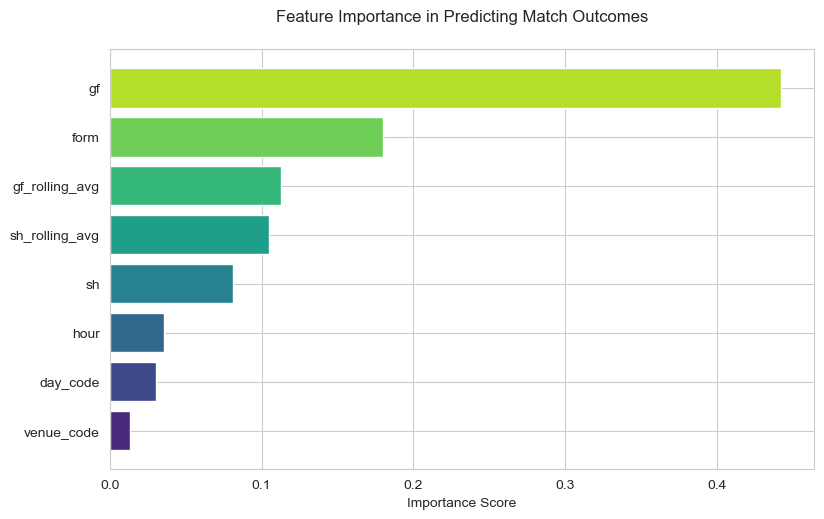

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style settings
plt.style.use('default')  # Reset to default style
sns.set_style("whitegrid")  # Apply seaborn's whitegrid style

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# 1. Feature Importance Plot
plt.subplot(2, 2, 1)
importance_df = pd.DataFrame({
    'feature': enhanced_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(y=importance_df['feature'], width=importance_df['importance'], 
         color=sns.color_palette("viridis", len(importance_df)))
plt.title('Feature Importance in Predicting Match Outcomes', 
          fontsize=12, pad=20)
plt.xlabel('Importance Score')



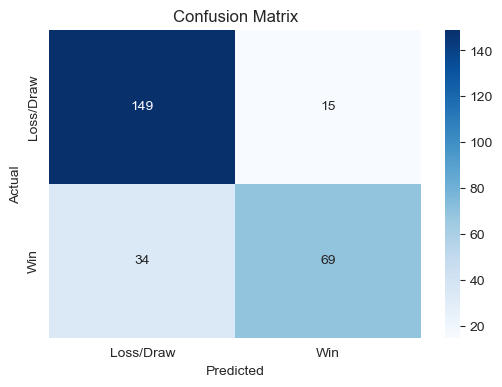

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_enhanced)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Loss/Draw', 'Win'], yticklabels=['Loss/Draw', 'Win'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


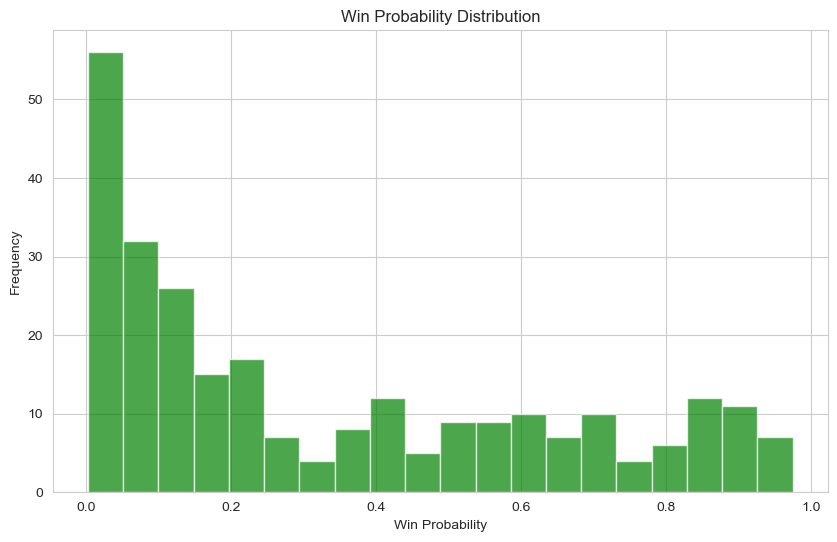

In [15]:
plt.figure(figsize=(10, 6))
win_probabilities = best_rf.predict_proba(X_test_enhanced)[:, 1]  # Probability for class 'Win'
plt.hist(win_probabilities, bins=20, alpha=0.7, color='green')
plt.title("Win Probability Distribution")
plt.xlabel("Win Probability")
plt.ylabel("Frequency")
plt.show()
